## Machine learning on the iris dataset

### Introducing the iris dataset

* 50 samples of 3 different species of iris (150 samples total)
* Measurements: sepal length, sepal width, petal length, petal width
![]("C:\\Users\\jason\\Documents\\Python_Scripts\\python machine learning\\img")
* 150 observations
* 4 features (sepal length, sepal width, petal length, petal width)
* Response variable is the iris species
* Classification problem since response is categorical

In [1]:
#数据展示,更多数据信息可以关注：http://archive.ics.uci.edu/ml/datasets/Iris
from IPython.display import IFrame
IFrame('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', width=300, height=200)

#### Loading the iris dataset into scikit-learn

In [6]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris

# save "bunch" object containing iris dataset and its attributes
iris = load_iris()

print(iris)

{'target_names': array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10'), 'data': array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.

In [7]:
# store feature matrix in "X"
X = iris.data

# store response vector in "y"
y = iris.target

# print the shapes of X and y
print(X.shape)
print(y.shape)

(150L, 4L)
(150L,)


### scikit-learn 4-step modeling pattern

In [8]:
#Step 1: Import the class you plan to use
from sklearn.neighbors import KNeighborsClassifier

#Step 2: "Instantiate" the "estimator",specify tuning parameters (aka "hyperparameters") 
knn = KNeighborsClassifier(n_neighbors=1)
#All parameters not specified are set to their defaults,print them
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')


In [9]:
#check the meaning of parameters
KNeighborsClassifier?

### Step 3: Fit the model with data (aka "model training")

In [12]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### Step 4: Predict the response for a new observation

In [13]:
knn.predict([[3, 5, 4, 2]])

array([2])

In [14]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn.predict(X_new)

array([2, 1])

In [32]:
### the complete code 

# import load_iris function from datasets module
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
# save "bunch" object containing iris dataset and its attributes
iris = load_iris()
X=iris.data;y=iris.target
#k=1
knn1=KNeighborsClassifier(n_neighbors=5)
knn1.fit(X,y)
#print knn1.predict(X)
print(metrics.accuracy_score(y, knn1.predict(x)))

#k=5
knn5=KNeighborsClassifier(n_neighbors=5)
knn5.fit(x,y)
print(metrics.accuracy_score(y, knn5.predict(x)))

from sklearn.linear_model import LogisticRegression
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(X,y)
# predict the response for new observations
print(metrics.accuracy_score(y, logreg.predict(x)))

0.966666666667
0.966666666667
0.96


但是对所有数据进行训练预测并不是有效，需要将数据分成train/test两类

### Using a different classification model

In [31]:
# STEP 1: split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
#注random_state用于保证实验的结果始终一样，并不随机
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(90L, 4L)
(60L, 4L)
(90L,)
(60L,)


### Evaluation procedure

In [36]:
print knn1.fit(X_train, y_train)
y_pred = knn1.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

print knn5.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

print logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
0.966666666667
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
0.95
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.95


### 如何确定最佳的K

In [60]:
# try K=1 through K=25 and record testing accuracy
scores=[]
for k in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score=metrics.accuracy_score(y_test,y_pred)
    scores.append(round(score,3))
print scores

[0.95, 0.95, 0.967, 0.967, 0.967, 0.983, 0.983, 0.983, 0.983, 0.983, 0.983, 0.983, 0.983, 0.983, 0.983, 0.983, 0.983, 0.967, 0.983, 0.967, 0.967, 0.967, 0.967, 0.95, 0.95]


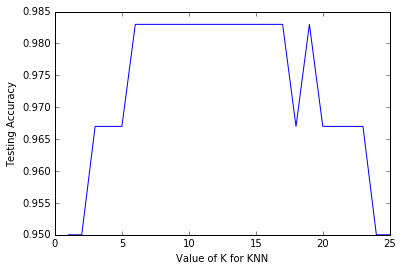

In [61]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

但是这样划分数据集始终存在问题，一次样本的抽取并不具有代表性，所以需要多次，但是如何抽样且多次测试才最有效，就是交叉验证法。

### Steps for K-fold cross-validation
* Split the dataset into K equal partitions (or "folds").
 
* Use fold 1 as the testing set and the union of the other folds as the training set.
 
* Calculate testing accuracy.

* Repeat steps 2 and 3 K times, using a different fold as the testing set each time.

* Use the average testing accuracy as the estimate of out-of-sample accuracy.


In [68]:
from sklearn.cross_validation import KFold
kf=KFold(25,n_folds=5,shuffle=False)
#print the contents of each training and testing set
print kf


 sklearn.cross_validation.KFold(n=25, n_folds=5, shuffle=False, random_state=None) <class 'sklearn.cross_validation.KFold'>


In [69]:
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{:^9} {} {:^25}'.format(iteration, data[0], data[1]))

Iteration                   Training set observations                   Testing set observations


SyntaxError: invalid syntax (<ipython-input-80-014372d0b04e>, line 1)

In [94]:
for iteration, data in enumerate(kf, start=1):
    print('{:^9}{} {:^25}'.format(iteration, data[0],data[1]))

    1    [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2    [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3    [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4    [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5    [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


* Dataset contains 25 observations (numbered 0 through 24)
* 5-fold cross-validation, thus it runs for 5 iterations
* For each iteration, every observation is either in the training set or the testing set, but not both
* Every observation is in the testing set exactly once
#### Cross-validation recommendations
* K can be any number, but K=10 is generally recommended

* For classification problems, stratified sampling is recommended for creating the folds
    * Each response class should be represented with equal proportions in each of the K folds
    * scikit-learn's cross_val_score function does this by default

### Cross-validation example: parameter tuning
Goal: Select the best tuning parameters (aka "hyperparameters") for KNN on the iris dataset

In [95]:
from sklearn.cross_validation import cross_val_score

# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


[0.96, 0.953, 0.967, 0.967, 0.967, 0.967, 0.967, 0.967, 0.973, 0.967, 0.967, 0.973, 0.98, 0.973, 0.973, 0.973, 0.973, 0.98, 0.973, 0.98, 0.967, 0.967, 0.973, 0.96, 0.967, 0.96, 0.967, 0.953, 0.953, 0.953]


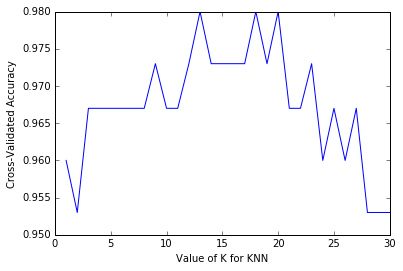

In [121]:
from sklearn.cross_validation import cross_val_score
k_scores=[]
k_range=range(1,31)
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X,y,cv=10,scoring="accuracy")
    k_scores.append(round(scores.mean(),3))
print k_scores
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

### Cross-validation example: feature selection
Goal: Select whether the Newspaper feature should be included in the linear regression model on the advertising dataset

In [125]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
# read in the advertising dataset
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
# create a Python list of three feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the DataFrame (X)
X = data[feature_cols]

# select the Sales column as the response (y)
y = data.Sales

# 10-fold cross-validation with all three features
lm=LinearRegression()
scores=cross_val_score(lm,X,y,cv=10,scoring="mean_squared_error")
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [126]:
# fix the sign of MSE scores
mse_scores = -scores
print(mse_scores)
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)
# calculate the average RMSE
print(rmse_scores.mean())

[ 3.56038438  3.29767522  2.08943356  2.82474283  1.3027754   1.74163618
  8.17338214  2.11409746  3.04273109  2.45281793]
[ 1.88689808  1.81595022  1.44548731  1.68069713  1.14139187  1.31971064
  2.85891276  1.45399362  1.7443426   1.56614748]
1.69135317081


In [ ]:
# 10-fold cross-validation with two features (excluding Newspaper)
feature_cols = ['TV', 'Radio']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='mean_squared_error')).mean())

### Improvements to cross-validation
#### Repeated cross-validation

Repeat cross-validation multiple times (with different random splits of the data) and average the results
More reliable estimate of out-of-sample performance by reducing the variance associated with a single trial of cross-validation
#### Creating a hold-out set

"Hold out" a portion of the data before beginning the model building process
Locate the best model using cross-validation on the remaining data, and test it using the hold-out set
More reliable estimate of out-of-sample performance since hold-out set is truly out-of-sample
#### Feature engineering and selection within cross-validation iterations
Normally, feature engineering and selection occurs before cross-validation
Instead, perform all feature engineering and selection within each cross-validation iteration
More reliable estimate of out-of-sample performance since it better mimics the application of the model to out-of-sample data